In [1]:
import os
import cv2 as cv2
import torch
import matplotlib.pyplot as plt
import pickle
import random
from torch.utils.data import Dataset

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jessicali9530/celeba-dataset")

print("Path to dataset files:", path)

c:\Users\ericy\anaconda3\envs\machine_learning\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\ericy\.cache\kagglehub\datasets\jessicali9530\celeba-dataset\versions\2


In [3]:
img = torch.tensor(cv2.imread(path + "/img_align_celeba/img_align_celeba/000002.jpg", cv2.IMREAD_COLOR))
print(img.shape)

torch.Size([218, 178, 3])


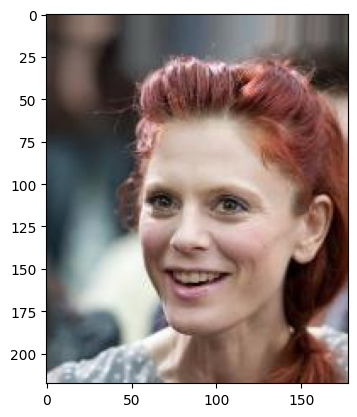

In [4]:
plt.imshow(img.flip(2))
plt.show()

In [4]:
n = 112
dir = os.listdir(path + "/img_align_celeba/img_align_celeba/")
l = len(dir)
images = torch.zeros((l,3,n,n))
for i in range(len(dir)):
    image = cv2.imread(path + "/img_align_celeba/img_align_celeba/" + dir[i], cv2.IMREAD_COLOR)
    image = image[20:198, :]
    image = cv2.resize(image,(n,n))
    image = torch.tensor(image).permute(2,0,1)/255
    image = image.flip(0)
    images[i] = image

In [5]:
print(l)

202599


In [6]:
l1 = int(0.95*l)
l2 = l - l1
train_images = torch.zeros((l1,3,n,n))
test_images = torch.zeros((l2,3,n,n))

for i in range(l1):
    train_images[i] = images[i]
for i in range(l2):
    test_images[i] = images[i+l1]

In [7]:
class ImageDataset(Dataset):

    def __init__(self, data, transform=None):
        self.data = data
        self.l = len(self.data)
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)

        return sample

In [8]:
train_dataset = ImageDataset(train_images)
test_dataset = ImageDataset(test_images)

In [9]:
file = open('train_dataset_small.pkl', 'wb')
pickle.dump(train_dataset, file)
file.close()

file = open('test_dataset_small.pkl', 'wb')
pickle.dump(test_dataset, file)
file.close()